<a href="https://colab.research.google.com/github/JADukeAIPI/AIPIProject/blob/main/EDA_and_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
from datetime import datetime, timedelta, date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegressioncars
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap




In [13]:
##clone the repo and import the data files
!git clone https://github.com/JADukeAIPI/AIPIProject.git


fatal: destination path 'AIPIProject' already exists and is not an empty directory.


In [79]:
#getting data. Note that this could come through the SQL query on the database
#but still in process, so using the archived csv files for this

#get events data
all_events_df = pd.read_csv('AIPIProject/all_events.csv')
large_events_df = pd.read_csv('AIPIProject/large_events.csv')

#get kaggle cars data
car_rental_data_df = pd.read_csv('AIPIProject/CarRentalDataV1.csv')

#get rental car data from the API
all_cars_df = pd.read_csv('AIPIProject/AllCarsAPI.csv')
luxury_cars_df = pd.read_csv('AIPIProject/LuxuryAPI.csv') 


In [80]:
atlanta_car_rental_data_df = car_rental_data_df[car_rental_data_df['location.city']=='Atlanta']
atlanta_car_rental_data_df

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airportcity
38,GASOLINE,5.00,52,44,Atlanta,US,33.640717,-84.427580,GA,6025007,144,Land Rover,Range Rover,suv,2016,Atlanta
42,GASOLINE,5.00,2,2,Atlanta,US,33.891295,-84.453929,GA,12796797,200,BMW,7 Series,car,2018,Atlanta
43,GASOLINE,4.93,18,14,Atlanta,US,33.903877,-84.277873,GA,53029,98,Mercedes-benz,C-Class,car,2019,Atlanta
45,GASOLINE,4.89,94,80,Atlanta,US,33.927403,-84.342767,GA,511103,150,Porsche,Panamera,car,2011,Atlanta
49,ELECTRIC,5.00,15,11,Atlanta,US,33.746442,-84.372238,GA,2253859,134,Tesla,Model 3,car,2018,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,GASOLINE,5.00,3,3,Atlanta,US,33.605798,-84.501351,GA,15622497,48,Jeep,Patriot,suv,2015,Atlanta
223,NaN,5.00,10,8,Atlanta,US,33.753282,-84.466572,GA,1886829,299,Land Rover,Range Rover,suv,2020,Atlanta
225,GASOLINE,4.91,36,34,Atlanta,US,33.811329,-84.375881,GA,3659271,99,BMW,4 Series Gran Coupe,car,2016,Atlanta
229,GASOLINE,4.70,100,81,Atlanta,US,33.772969,-84.419985,GA,7221030,50,Buick,LaCrosse,car,2016,Atlanta


In [81]:

all_cars_df

,Unnamed: 0,Vehicle_id,Vehicle_Name,Category,Transmission,Base_Price,Price,Date_Pickup,Date_Dropoff
0,85,644881578,Ford Mustang Cabrio,Standard,Automatic,244.83,252.90,2022-11-18,2022-11-19
1,92,646119363,Ford Mustang Cabrio,Standard,Automatic,231.37,238.99,2022-11-18,2022-11-19
2,81,644901178,Ford Mustang Cabrio,Standard,Automatic,226.77,234.24,2022-11-18,2022-11-19
3,79,644861498,Ford Mustang Cabrio,Standard,Automatic,214.75,221.83,2022-11-18,2022-11-19
4,87,646151248,Ford Mustang Cabrio,Standard,Automatic,213.43,220.46,2022-11-18,2022-11-19
...,...,...,...,...,...,...,...,...,...
33471,3,636464748,Hyundai Elantra,Intermediate,Automatic,114.29,118.06,2023-03-02,2023-03-03
33472,6,631553748,Toyota Corolla,Intermediate,Automatic,114.28,118.05,2023-03-02,2023-03-03
33473,1,631938668,Toyota Corolla,Intermediate,Automatic,112.25,115.95,2023-03-02,2023-03-03
33474,4,585207153,Nissan Sentra,Intermediate,Automatic,112.25,115.95,2023-03-02,2023-03-03


In [82]:
luxury_cars_df

,Unnamed: 0,Vehicle_id,Vehicle_Name,Category,Transmission,Base_Price,Price,Date_Pickup,Date_Dropoff
0,82,644881573,Cadillac XTS,Luxury,Automatic,176.95,182.78,2022-11-18,2022-11-19
1,84,646119413,Cadillac XTS,Luxury,Automatic,163.90,169.30,2022-11-18,2022-11-19
2,93,644901168,Cadillac XTS,Luxury,Automatic,158.89,164.13,2022-11-18,2022-11-19
3,90,644861493,Cadillac XTS,Luxury,Automatic,146.87,151.71,2022-11-18,2022-11-19
4,89,646151293,Cadillac XTS,Luxury,Automatic,145.96,150.77,2022-11-18,2022-11-19
...,...,...,...,...,...,...,...,...,...
2636,76,636464758,Cadillac XTS,Luxury,Automatic,156.08,161.22,2023-03-02,2023-03-03
2637,48,631938698,Buick LaCrosse,Luxury,Automatic,155.49,160.61,2023-03-02,2023-03-03
2638,94,585207183,Chrysler 300,Luxury,Automatic,155.49,160.61,2023-03-02,2023-03-03
2639,58,735895261,Cadillac XTS,Luxury,Automatic,150.33,155.28,2023-03-02,2023-03-03


In [83]:
#cleaning our archived rental data for next 3 months by getting rid of the old index column, 
#and changing the current index to the Date_Pickup changed to datetime

def clean_cars(df):
  df1=df.copy()
  df1.drop('Unnamed: 0', axis=1, inplace=True)
  df1.set_index('Date_Pickup', inplace=True)

  df1.index = pd.to_datetime(df1.index, format=('%Y-%m-%d'))
  #removing dropoff date since arbitrarily chosen to be 1 day after pickup date
  df1.drop('Date_Dropoff', axis=1, inplace = True)

  return(df1)
 

In [84]:
#luxury_cars_df.columns

clean_luxury_cars_df = clean_cars(luxury_cars_df)
clean_all_cars_df = clean_cars(all_cars_df)

In [88]:
#get total counts of all cars in dataframes for each day
luxury_count = clean_luxury_cars_df.groupby(clean_luxury_cars_df.index)['Vehicle_id'].count()
all_car_count = clean_all_cars_df.groupby(clean_all_cars_df.index)['Vehicle_id'].count()

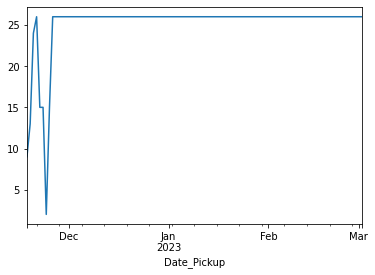

In [91]:
luxury_count.plot()

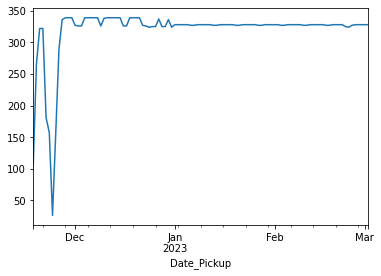

In [92]:
all_car_count.plot()

In [96]:
all_car_count.idxmin(), all_car_count.min(), all_car_count.max(), luxury_count.min(), luxury_count.max()

(Timestamp('2022-11-24 00:00:00'), 26, 339, 2, 26)

A couple things to note:
1. There is low inventory for both call cars and luxury cars on the dates around 2022-11-24 due to Thanksgiving holiday. 
2. For luxury cars there is fairly flat inventory after late november, at about 26 cars.
3. For all cars, there is some variation in the inventory until shortly after january 1st due to rentals, which appears to have some weekly seasonality. The maximum inventory for all cars is 339 cars, with the mininum being 26 cars at Thanksgiving.
4. For all and luxury cars, there is also a relatively low inventory of cars in the next ady or two, which suggests that the majority of cars may be reserved close to when they are needed rather than several weeks away; this seems particularly true for luxury cars. 

In [97]:
##look at prices over time for all and luxury cars

car_prices = clean_all_cars_df.groupby([clean_all_cars_df.index, 'Vehicle_Name'])['Price'].mean()
car_prices

Date_Pickup  Vehicle_Name      
2022-11-18   Cadillac XTS          152.823333
             Cadillac XTS          150.390000
             Chevrolet Tahoe       149.440000
             Dodge Challenger      115.440000
             Ford Expedition       122.060000
                                      ...    
2023-03-02   Toyota Tacoma         171.070000
             Volkswagen Atlas      242.680000
             Volkswagen Jetta      187.384286
             Volkswagen Jetta      166.288235
             Wild Card             222.456667
Name: Price, Length: 7314, dtype: float64

In [103]:
car_prices.loc['2022-11-18'], car_prices.loc['2022-11-24']

(Date_Pickup  Vehicle_Name        
 2022-11-18   Cadillac XTS            152.823333
              Cadillac XTS            150.390000
              Chevrolet Tahoe         149.440000
              Dodge Challenger        115.440000
              Ford Expedition         122.060000
              Ford F150               136.090000
              Ford Fusion             113.150000
              Ford Fusion              82.168333
              Ford Mustang  Cabrio    229.587500
              Ford Mustang Cabrio     215.822500
              Hyundai Elantra          88.270000
              Hyundai Santa Fe        119.860000
              Mitsubishi Mirage        82.996250
              Nissan Frontier          94.018333
              Nissan Maxima           137.266667
              Nissan Maxima           134.770000
              Nissan Pathfinder       106.767500
              Nissan Rogue            113.242500
              Nissan Versa             82.996250
              Toyota RAV4         

As a snapshot, here are rental rates for various cars in inventory (averaged by car type) for two dates: today and Thanksgiving. One, the shift is towards more high end cars available on thanksgiving, but also for cars that are available on both days (e.g., Volkswagen Jetter, Nissan Versa), the prices are much higher on Thanksgiving due to the high demand. 

Let's explore the prices over time for 3 vehicles: Nissan Pathfinder, BMW 5 Series, and Cadillac XTS

In [128]:
Pathfinder = clean_all_cars_df[clean_all_cars_df['Vehicle_Name']=='Nissan Pathfinder']['Price']
BMW5 = clean_all_cars_df[clean_all_cars_df['Vehicle_Name']=='BMW 5 Series']['Price']
Caddy = clean_all_cars_df[clean_all_cars_df['Vehicle_Name']=='Cadillac XTS']['Price']


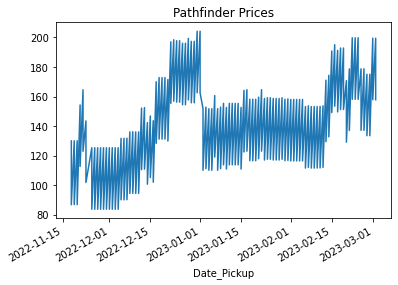

In [132]:
Pathfinder.plot(title='Pathfinder Prices')

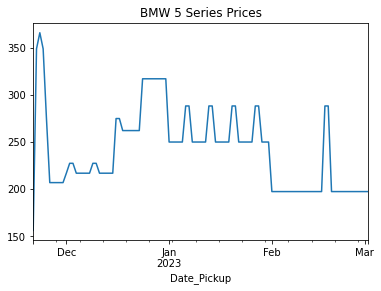

In [131]:
BMW5.plot(title='BMW 5 Series Prices')

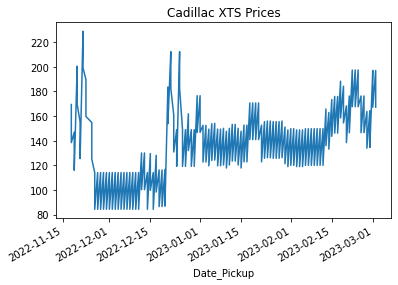

In [133]:
Caddy.plot(title = 'Cadillac XTS Prices')

A couple things to note:
1. High demand pricing for all cars over Thanksgiving and then between/around Christmas to New Years. 
2. There is some weekly seasonality as well, most notable for the BMW (corresponding to the weekends).
3. There are high prices in the latter half of February into early March...we will look at the events to see if there is an explanation. 